In [94]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [7]:
df = pd.read_csv('../csv-data/basketball_stat.csv', encoding='utf-8')
df.head()

Player Pos   3P   2P  TRB  AST  STL  BLK
0    Alex Abrines  SG  1.4  0.6  1.3  0.6  0.5  0.1
1    Steven Adams   C  0.0  4.7  7.7  1.1  1.1  1.0
2   Alexis Ajinca   C  0.0  2.3  4.5  0.3  0.5  0.6
3  Chris Andersen   C  0.0  0.8  2.6  0.4  0.4  0.6
4     Will Barton  SG  1.5  3.5  4.3  3.4  0.8  0.5

Text(0.5, 1.0, 'STL and 2P')

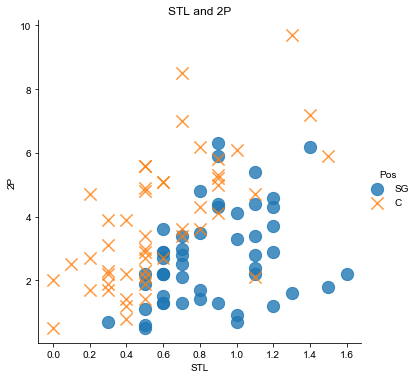

In [8]:
sns.lmplot('STL', '2P', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('STL and 2P')

Text(0.5, 1.0, 'AST and 2P')

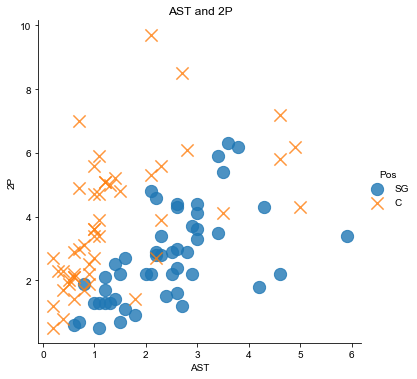

In [9]:
sns.lmplot('AST', '2P', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('AST and 2P')

Text(0.5, 1.0, '3P and BLK')

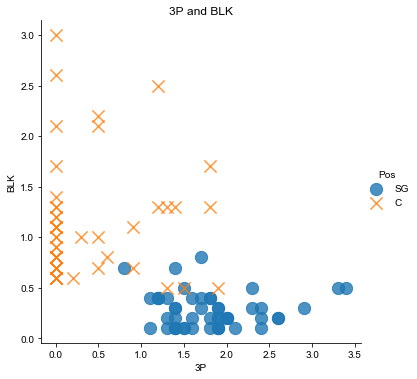

In [10]:
sns.lmplot('3P', 'BLK', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('3P and BLK')

Text(0.5, 1.0, '3P and TRB')

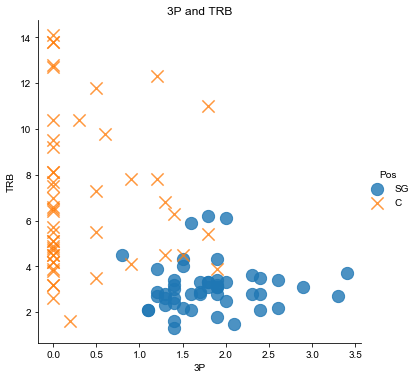

In [11]:
sns.lmplot('3P', 'TRB', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('3P and TRB')

In [12]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [13]:
df.drop(['2P',  'AST', 'STL'], axis=1, inplace=True)

In [14]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [15]:
df.head()

Player Pos   3P  TRB  BLK
0    Alex Abrines  SG  1.4  1.3  0.1
1    Steven Adams   C  0.0  7.7  1.0
2   Alexis Ajinca   C  0.0  4.5  0.6
3  Chris Andersen   C  0.0  2.6  0.6
4     Will Barton  SG  1.5  4.3  0.5

In [16]:
## train, test split
# train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
# test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.iloc[:, 2:], #문제(설명변수 3개, 인덱스 2~끝),
                                                    df.iloc[:, 1], #정답(종속변수 1개, target, 인덱스 1)
                                                    test_size=0.2,  #테스트 비율
                                                    random_state=42#랜덤 시드값
)

In [19]:
df.shape

(100, 5)

In [20]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [21]:
df.values[:3]

array([['Alex Abrines', 'SG', 1.4, 1.3, 0.1],
       ['Steven Adams', 'C', 0.0, 7.7, 1.0],
       ['Alexis Ajinca', 'C', 0.0, 4.5, 0.6]], dtype=object)

In [22]:
X_train.shape, y_train.shape

((80, 3), (80,))

In [23]:
X_test.shape, y_test.shape

((20, 3), (20,))

In [24]:
X_train.index

Int64Index([55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28, 93,  5, 66,
            65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,  3, 17, 38,
             8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79,
            41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1, 52, 21,  2,
            23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51],
           dtype='int64')

In [25]:
X_test.index

Int64Index([83, 53, 70, 45, 44, 39, 22, 80, 10, 0, 18, 30, 73, 33, 90, 4, 76,
            77, 12, 31],
           dtype='int64')

In [26]:
## 모델 선정 => cross-validation(교차검증)
## knn, svm, decison tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt]

In [28]:
model_list

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [29]:
def print_cv(model, train, test, k):
    scores = cross_val_score(model, train, test, cv = k)
    print('-------교차검증(cv) 리스트 결과-------', scores)
    mean_scores = np.mean(scores)
    print('-------교차검증(cv) 평균 결과-------', mean_scores)
    return scores, mean_scores 
     
    ## 함수의 결과로 여러개의 데이터를 return할 수 있다. 
    ## 튜플로 묶어서 반환하게 된다.(scores, mean_scores)

In [30]:
# cv_result = print_cv() ## cv_result는 tuple이 저장, (scores, mean_scores)
# index_0 = cv_result[0]
# index_1 = cv_result[1]

In [31]:
# index_0, index_1 = print_cv()

In [32]:
# k = 5, 전체 몇 번을 교차검증을 하게 될까요?
# model_n : 3, k_n : 5, total_n : 15

In [33]:
model_names = ['NeighborsClassifier', 'SVC', 'DecisionTreeClassifier'] #[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]
sc_list = []
mean_sc_list = []
for model in model_list:
    sc, mean_sc = print_cv(model, X_train, y_train, 5)
    sc_list.append(sc)
    mean_sc_list.append(mean_sc)
    
print('\n*********************************************')
print('----- 전체 모델 리스트 -----')
print(model_names)
print('----- 전체 모델의 교차검증 결과 리스트 -----')
print(sc_list)
print('----- 전체 모델의 교차검증 결과 평균 -----')
print(mean_sc_list)

-------교차검증(cv) 리스트 결과------- [0.9375 0.8125 0.8125 0.875  1.    ]
-------교차검증(cv) 평균 결과------- 0.8875
-------교차검증(cv) 리스트 결과------- [0.875  0.875  0.8125 0.9375 1.    ]
-------교차검증(cv) 평균 결과------- 0.9
-------교차검증(cv) 리스트 결과------- [0.9375 1.     0.875  0.875  1.    ]
-------교차검증(cv) 평균 결과------- 0.9375

*********************************************
----- 전체 모델 리스트 -----
['NeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
----- 전체 모델의 교차검증 결과 리스트 -----
[array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ]), array([0.875 , 0.875 , 0.8125, 0.9375, 1.    ]), array([0.9375, 1.    , 0.875 , 0.875 , 1.    ])]
----- 전체 모델의 교차검증 결과 평균 -----
[0.8875, 0.9, 0.9375]


(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.8875, 0.8925, 0.8975, 0.9025, 0.9075, 0.9125, 0.9175, 0.9225,
        0.9275, 0.9325, 0.9375]),
 <BarContainer object of 10 artists>)

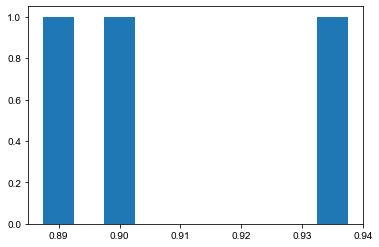

In [34]:
## 시각화해서 비교해보자.
plt.hist(mean_sc_list)

In [35]:
## 교차검증 결과 Decision Tree를 사용해서 테스트 해보기로 결정함.!!!

In [36]:
## 하이퍼 파라메터 => grid search

In [45]:
# def grid_search():
#     gs_model = GridSearchCV(dt, {'max_depth' : [1,3]}, cv=5)
#     print(gs_model)

# def grid_search(model, params, k):
#     gs_model = GridSearchCV(model, params, cv=k)
#     print(gs_model)

In [38]:
params = { #하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4 * 3 * 2: 24개의 경우의 수
    'max_depth': [3, 5, 7, 10], #key : 하이퍼파라메터명, values는 list타입이어야 함.
    'random_state': [1, 3, 5],
    'criterion' : ['gini', 'entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준
}

[ ** Decsion Tree Parameters ** ]

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<img src='https://github.com/aliciawill/python-data/blob/master/data12/dt_params2.png?raw=true' 
         width=600, height=600
     >
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_002.png'>

In [46]:
# 함수의 모든 파라메터를 보고 싶으면 함수명쓰고 shift_tab
grid_search() 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3]})


<img src='https://github.com/aliciawill/python-data/blob/master/data12/fun_params_show2.png?raw=true'>

In [47]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    ## gs_model는 최적의 파라메터가 적용된 모델의 객체!
    gs_model.fit(X_train, y_train)
    print(gs_model.best_estimator_) ## 최적의 파라메터가 적용된 모델 객체 
    print(gs_model.best_score_) ## 최적의 파라메터가 적용된 모델로 학습한 정확도 결과(accuracy)
    print(gs_model.best_params_) ## 그리드 서치를 통해 찾은 최적의 파라메터
    print(gs_model) ## grid_search 객체 

In [48]:
grid_search(dt, params, 5) #grid_search의 모든 경우의 수는 24 * 5

DecisionTreeClassifier(max_depth=3, random_state=1)
0.95
{'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [49]:
## => 그리드 서치를 통해서 찾은 
## => 최적의 파라메터는 {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}

In [101]:
## 최적의 하이퍼 파라메터로 모델 객체 생성
## fit()
dt_gs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [87]:
## 테스트 데이터로 검증해보자!
predict_result = None
def test_validation(model, X_test, y_test):
    global predict_result
    predict_result = model.predict(X_test)
    print(predict_result)
    acc = accuracy_score(y_test, predict_result )
    print('accuracy >> ', acc)
    cf = confusion_matrix(y_test, predict_result)
    # 실제(c)--> 예측(c, sg), 실제(sg)--> 예측(sg, c), 
    # 이진분류(binary classification)인 경우에는 
    # 예측할 수 있는 경우의 수는 4가지!
    # 4가지를 표형태로 정리해주는 것이 confusion_matrix
    # 첫번째 행/열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정!
    print('confusion matrix >> \n', cf)
    ## confusion matrix는 binary classfication인 경우에는 보기가 괜찮으나,
    ## multi class classification인 경우에는 보기가 힘들다.
    ## confusion matrix를 가독성 좋게 볼 수 있는 것이 classification_report
    c_report = classification_report(y_test, predict_result)
    print('classification report >> \n', c_report)

In [52]:
y_test.value_counts()

C     10
SG    10
Name: Pos, dtype: int64

In [88]:
test_validation(dt_gs, X_test, y_test)

['C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C'
 'SG' 'C' 'SG' 'C']
accuracy >>  0.95
confusion matrix >> 
 [[10  0]
 [ 1  9]]
classification report >> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [89]:
## c는 10개를 다 맞춤. sg는 9개를 맞추고, 1개를 c로 예측함(틀림)
## 정확도가 95%가 나왔음.
## acc = 10 + 9/ 10 + 9 + 1
## 정확도 = 
##               실제C:예측C + 실제SG:실제SG / 
##               실제C:예측C + 실제SG:실제SG + 실제C:예측SG + 실제SG예측C
test_validation(dt_gs, X_test, y_test)

['C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C'
 'SG' 'C' 'SG' 'C']
accuracy >>  0.95
confusion matrix >> 
 [[10  0]
 [ 1  9]]
classification report >> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [55]:
## recall(재현율) :  예측을 C로 제대로 한 개수(10개) /실제 C로 맞추어야할 개수(10개)
##                          
# 실제 C(10개)중에서, 예측한 값들을 보면 
#                                실제 C로 100% 정확하게 예측해냈고, 
#                                SG로 예측한 것은 없다.
# 실제 SG(10개)중에서, 예측한 값들을 보면 
#                               실제 SG로 예측한 것이 90%이고, 
#                               C로 예측한 것이 10%이다.

## precision(정밀도)
# 예측한 C(11개)중에서 
#                               실제 91%가 C였고, SG는 9%이다.
# 예측한 SG(9개)중에서 
#                               실제 100%가 SG였고, C는 없었다.

## f1-score는 재현율과 정밀도의 평균

## confusion-matrix에서 가로방향이 recall, 세로방향이 precision

In [56]:
## 정확도 체크, acc, recall, precision, f1-score
##  confusion matrix(혼동행렬)

In [60]:
type(y_test)

pandas.core.series.Series

In [90]:
predict_result

array(['C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'C',
       'SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'C'], dtype=object)

In [80]:
y_test

83     C
53     C
70    SG
45    SG
44     C
39    SG
22    SG
80    SG
10     C
0     SG
18     C
30     C
73    SG
33     C
90     C
4     SG
76    SG
77     C
12    SG
31     C
Name: Pos, dtype: object

In [91]:
result_df = pd.DataFrame({
    'predict_result' : predict_result,
    'y_test' : y_test
})

In [92]:
result_df

predict_result y_test
83              C      C
53              C      C
70             SG     SG
45             SG     SG
44              C      C
39             SG     SG
22             SG     SG
80             SG     SG
10              C      C
0              SG     SG
18              C      C
30              C      C
73             SG     SG
33              C      C
90              C      C
4               C     SG
76             SG     SG
77              C      C
12             SG     SG
31              C      C

In [95]:
encoder = LabelEncoder()

In [96]:
col = result_df.columns
col

Index(['predict_result', 'y_test'], dtype='object')

In [97]:
for c in col:
    result_df[c] = encoder.fit_transform(result_df[c])

In [98]:
result_df

predict_result  y_test
83               0       0
53               0       0
70               1       1
45               1       1
44               0       0
39               1       1
22               1       1
80               1       1
10               0       0
0                1       1
18               0       0
30               0       0
73               1       1
33               0       0
90               0       0
4                0       1
76               1       1
77               0       0
12               1       1
31               0       0

In [102]:
y_pred_proba = dt_gs.predict_proba(X_test)[:, 1]

In [103]:
y_pred_proba

array([0.02631579, 0.02631579, 1.        , 1.        , 0.02631579,
       1.        , 1.        , 1.        , 0.02631579, 1.        ,
       0.4       , 0.4       , 1.        , 0.02631579, 0.02631579,
       0.4       , 1.        , 0.02631579, 1.        , 0.02631579])

In [105]:
for_roc_df = pd.DataFrame({
    'y_test' : y_test,
    'y_pred_proba' : y_pred_proba
})
for_roc_df

y_test  y_pred_proba
83      C      0.026316
53      C      0.026316
70     SG      1.000000
45     SG      1.000000
44      C      0.026316
39     SG      1.000000
22     SG      1.000000
80     SG      1.000000
10      C      0.026316
0      SG      1.000000
18      C      0.400000
30      C      0.400000
73     SG      1.000000
33      C      0.026316
90      C      0.026316
4      SG      0.400000
76     SG      1.000000
77      C      0.026316
12     SG      1.000000
31      C      0.026316

In [107]:
for_roc_df['y_test'] = encoder.fit_transform(for_roc_df['y_test'])

In [108]:
for_roc_df

y_test  y_pred_proba
83       0      0.026316
53       0      0.026316
70       1      1.000000
45       1      1.000000
44       0      0.026316
39       1      1.000000
22       1      1.000000
80       1      1.000000
10       0      0.026316
0        1      1.000000
18       0      0.400000
30       0      0.400000
73       1      1.000000
33       0      0.026316
90       0      0.026316
4        1      0.400000
76       1      1.000000
77       0      0.026316
12       1      1.000000
31       0      0.026316

In [112]:
y_test

83    0
53    0
70    1
45    1
44    0
39    1
22    1
80    1
10    0
0     1
18    0
30    0
73    1
33    0
90    0
4     1
76    1
77    0
12    1
31    0
Name: Pos, dtype: int64

In [113]:
y_test.dtype

dtype('int64')

In [119]:
# roc_curve(타겟값, prob of 1) 그래프 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
'FPR': fpr, 
'TPR': tpr, 
'Threshold': thresholds
})

In [120]:
roc

FPR  TPR  Threshold
0  0.0  0.0   2.000000
1  0.0  0.9   1.000000
2  0.2  1.0   0.400000
3  1.0  1.0   0.026316

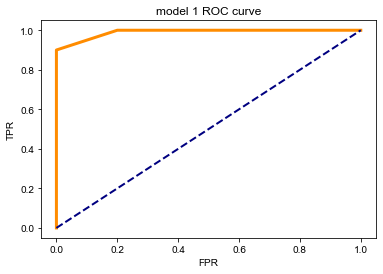

In [124]:
plt.plot(fpr, tpr,   color="darkorange", lw=3,)
plt.title('model 1 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

In [125]:
## FP가 0일때, TP는 0이였고,
## FP가 0.2일 때, TP는 0.8였음.
## FP가 0.2가 넘는다고 하더라도 TP는 1이 나온 분류 모델!

In [128]:
##====
y_test_2 = encoder.inverse_transform(y_test)
y_test_2

array(['C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [130]:
predict_result_2 = encoder.fit_transform(predict_result)
predict_result_2

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [131]:
print(roc_auc_score(y_test, predict_result_2)) ##auc값 함수

0.95


In [132]:
## roc, auc와 관련된 함수 입력값은 라벨링되어 있어야 함.